In [ ]:
#Classification of CIFAR-10 dataset

In [ ]:
# Import Required Libraries
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define Paths and Parameters
dataset_path = '/content/drive/MyDrive/MiniProject Weed Detection/Using-dataset-2/CNN-DataSets2'  # Adjust this path
base_dir = '/content/dataset'
# base_dir = '/content/dataset/train'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
img_width, img_height = 150, 150
batch_size = 32
epochs = 10
split_size = 0.2

In [ ]:
# Create training and testing directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
# Function to split data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    for category in os.listdir(SOURCE):
        category_path = os.path.join(SOURCE, category)
        files = os.listdir(category_path)
        files = [os.path.join(category_path, f) for f in files]
        train_files, test_files = train_test_split(files, test_size=SPLIT_SIZE, random_state=42)

        train_category_path = os.path.join(TRAINING, category)
        test_category_path = os.path.join(TESTING, category)

        os.makedirs(train_category_path, exist_ok=True)
        os.makedirs(test_category_path, exist_ok=True)

        for f in train_files:
            shutil.copy(f, train_category_path)
        for f in test_files:
            shutil.copy(f, test_category_path)

# Split the data
split_data(dataset_path, train_dir, test_dir, split_size)

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training and testing data generators
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

Found 345 images belonging to 2 classes.
Found 105 images belonging to 2 classes.


In [ ]:

# keras imports for the dataset and building our neural network
from keras.datasets import mnist

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
#from tensorflow.keras.utils import np_utils

In [ ]:
from keras.layers import Input
from keras.layers import Dense, Conv2D, Flatten, Rescaling
from keras.models import Model
#import tensorflow_addons as tfa
import tensorflow as tf
# Build the Feed-Forward Neural Network


model = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(4)
])

In [ ]:
# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# Train the Model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs, validation_data=test_generator, validation_steps=test_generator.samples // batch_size)

# Evaluate the Model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
10/10 [==============================] - 29s 3s/step - loss: 2.3743 - accuracy: 0.3482 - val_loss: 1.4925 - val_accuracy: 0.2708
Epoch 2/10
10/10 [==============================] - 25s 2s/step - loss: 1.7214 - accuracy: 0.3067 - val_loss: 1.5931 - val_accuracy: 0.2604
Epoch 3/10
10/10 [==============================] - 26s 3s/step - loss: 1.7064 - accuracy: 0.3035 - val_loss: 1.5125 - val_accuracy: 0.2708
Epoch 4/10
10/10 [==============================] - 34s 3s/step - loss: 1.7730 - accuracy: 0.3355 - val_loss: 1.4714 - val_accuracy: 0.2708
Epoch 5/10
10/10 [==============================] - 31s 3s/step - loss: 1.7093 - accuracy: 0.3227 - val_loss: 1.5256 - val_accuracy: 0.2812
Epoch 6/10
10/10 [==============================] - 30s 3s/step - loss: 1.6215 - accuracy: 0.3035 - val_loss: 1.4719 - val_accuracy: 0.2708
Epoch 7/10
10/10 [==============================] - 30s 3s/step - loss: 1.6601 - accuracy: 0.3131 - val_loss: 1.3814 - val_accuracy: 0.2500
Epoch 8/10
10/10 [==

In [ ]:
import numpy as np
predictions = np.argmax(model.predict(test_generator),axis=1)
labels = test_generator.classes

4/4 [==============================] - 4s 899ms/step


In [ ]:
classes = []
for i in os.listdir(dataset_path):
    classes+=[i]

classes

['test', 'train']

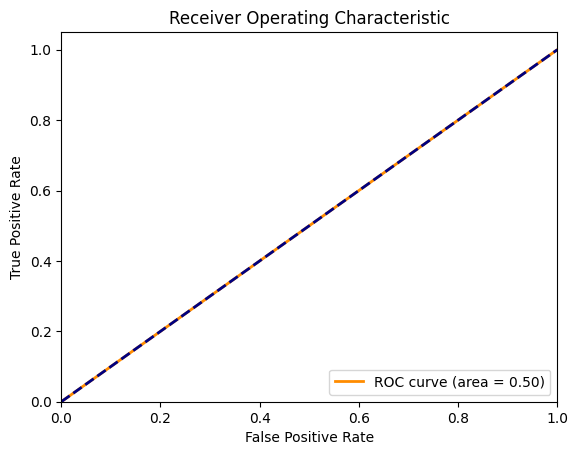

In [ ]:
# Assuming you have true labels 'y_true' and predicted probabilities 'y_pred_prob'
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions, labels, target_names=classes))

              precision    recall  f1-score   support

        test       1.00      0.26      0.41       105
       train       0.00      0.00      0.00         0

    accuracy                           0.26       105
   macro avg       0.50      0.13      0.20       105
weighted avg       1.00      0.26      0.41       105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


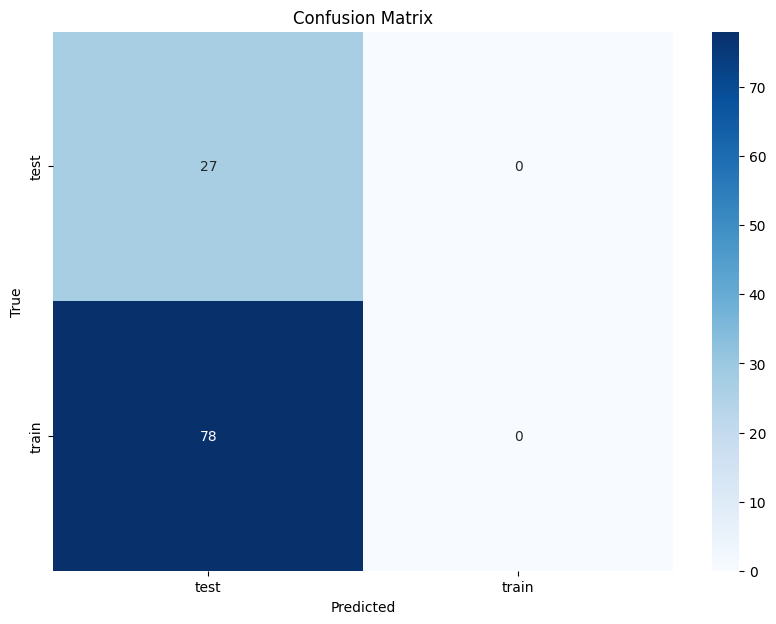

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predictions' and 'labels' are defined as in your code
cm = confusion_matrix(labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

4/4 [==============================] - 5s 1s/step


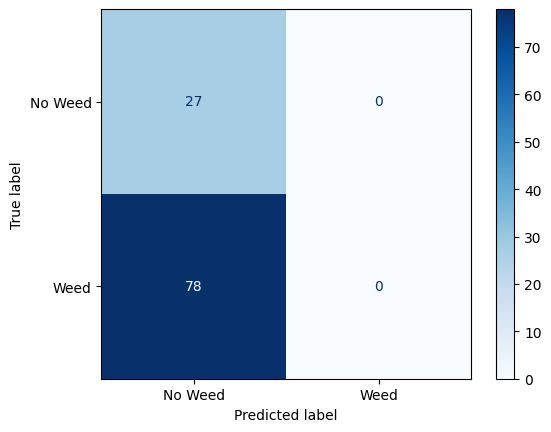

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# True labels and predictions
true_labels = test_generator.classes
predictions = np.argmax(model.predict(test_generator), axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Weed', 'Weed'])
disp.plot(cmap='Blues')
plt.show()


In [ ]:
# Define the folder path
folder_path = '/content/drive/My Drive/models/'  # Replace with your desired folder path

# Create the folder if it doesn't exist
import os
os.makedirs(folder_path, exist_ok=True)

# Save the model
model.save(os.path.join(folder_path, 'model.h5'))